In [1]:
import pandas as pd
from pathlib import Path
import sys
import statsmodels.api as sm
from statsmodels.tools import add_constant
import matplotlib.pyplot as plt
from fcutils.plot.figure import clean_axes
from sklearn.model_selection import KFold
from myterial import teal_dark, teal, indigo_dark, blue_darker, pink, salmon_dark

colors = dict(
    s=teal_dark,
    curv_10cm=teal,
    curv_15cm=teal,
    curv_20cm=teal,
    curv_30cm=teal,
    v=salmon_dark, 
    dv_250ms=pink,
    dv_500ms=pink,
    dv_1000ms=pink,
    omega=blue_darker,
    domega_250ms=indigo_dark,
    domega_500ms=indigo_dark,
    domega_1000ms=indigo_dark,
)


sys.path.append("./")
sys.path.append(r"C:\Users\Federico\Documents\GitHub\pysical_locomotion")


glm_cache = Path(
    r"D:\Dropbox (UCL)\Rotation_vte\Locomotion\analysis\ephys\GLM\data"
)
population_cache = Path(
    r"D:\Dropbox (UCL)\Rotation_vte\Locomotion\analysis\ephys\population\data"
)

In [3]:
df = pd.read_parquet(population_cache / "FC_220414_BAA1101192_hairpin.parquet")
# df = df.drop(columns=["curv_35cm", "curv_40cm", "curv_45cm", "curv_50cm", "curv_55cm", "curv_60cm"], inplace=False)

# remove rows with nans
print(df.shape)
df = df.dropna(axis=0)
print(df.shape)
df.reset_index(inplace=True, drop=True)


units = [c for c in df.columns[18:] if "shuffle" not in c]

# activity.head()

(26414, 1937)
(21402, 1937)


In [6]:
# normalize df
df_norm = (df - df.mean()) / df.std()

activty = df_norm[units]

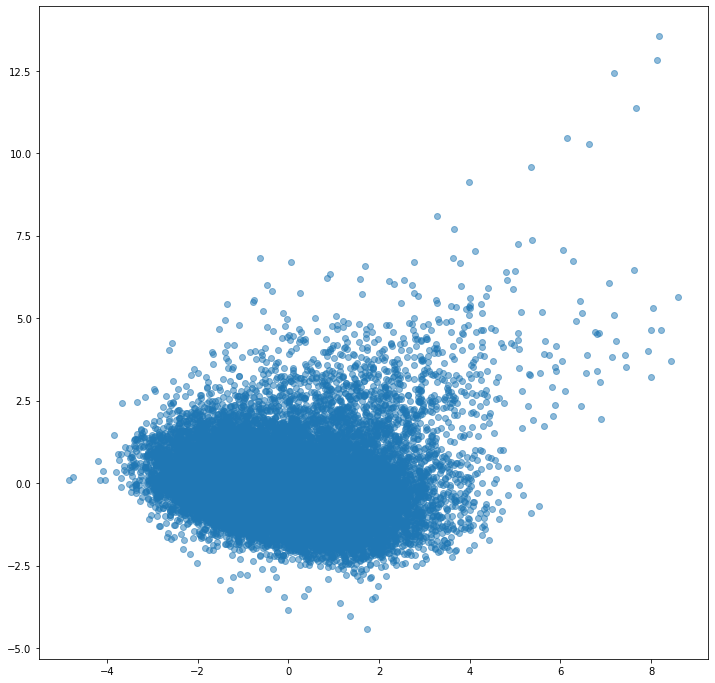

In [7]:
from sklearn.decomposition import PCA

# plot first 2 PC
pca = PCA(n_components=2)
pca.fit(activty)
df_pca = pca.transform(activty)

f, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.scatter(df_pca[:, 0], df_pca[:, 1], alpha=.5)

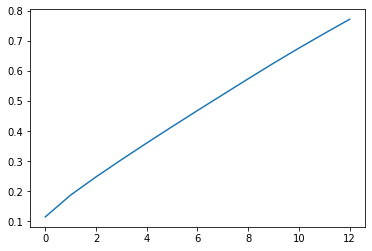

In [8]:
# plot fraction of variance explained by each PC

import numpy as np
pca = PCA(n_components=13)
pca.fit(activty)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
